# Comprehensive Evaluation - Benchmark Comparison with EDA

This notebook includes:
1. **Exploratory Data Analysis (EDA)** of the movie dataset
2. **Performance comparison** of 4 index structures (KD-Tree, QuadTree, Range Tree, R-Tree)
3. **Visualizations** and statistical analysis

---
# Part 1: Exploratory Data Analysis (EDA)
---

## 1. Import Libraries

In [74]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

print('All libraries imported successfully')

All libraries imported successfully


## 2. Load Movie Dataset

In [75]:
# Load the raw movie dataset
df_movies = pd.read_csv('data_movies_clean.csv')

# Extract year from release_date if it exists
if 'release_date' in df_movies.columns:
    df_movies['release_year'] = pd.to_datetime(df_movies['release_date'], errors='coerce').dt.year

print(f'Loaded {len(df_movies)} movies')
print(f'\nDataset shape: {df_movies.shape}')
print(f'\nColumns: {list(df_movies.columns)}')

Loaded 946460 movies

Dataset shape: (946460, 15)

Columns: ['id', 'title', 'adult', 'original_language', 'origin_country', 'release_date', 'genre_names', 'production_company_names', 'budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count', 'release_year']


## 3. Dataset Overview

In [76]:
# Display first few rows
print('First 5 movies:')
print('=' * 100)
df_movies.head()

First 5 movies:


,id,title,adult,original_language,origin_country,release_date,genre_names,production_company_names,budget,revenue,runtime,popularity,vote_average,vote_count,release_year
0,195554,Panorama of Galveston Power House,False,en,['US'],1900-05-21,[],[],2426.703143,3322.065977,1,6.3707,4.0,4,1900
1,105303,Explosion of a Motor Car,False,xx,['GB'],1900-07-01,['Comedy'],['Hepworth'],1486.884235,1605.985979,2,3.4255,6.1,55,1900
2,195553,"Panorama of Orphans' Home, Galveston",False,en,['US'],1900-09-21,[],[],4686.762515,3456.639124,1,3.2375,4.0,5,1900
3,195569,Panorama of Wreckage of Water Front,False,en,['US'],1900-09-21,['Documentary'],['Edison Studios'],1908.864318,2122.609487,1,5.1725,4.0,4,1900
4,195542,"Bird's-Eye View of Dock Front, Galveston",False,en,['US'],1900-09-21,['Documentary'],['Edison Studios'],315.082092,202.940975,1,4.0098,4.0,2,1900


## 4. Basic Statistics

In [77]:
# Statistical summary of numerical columns
print('Statistical Summary:')
print('=' * 100)
df_movies.describe()

Statistical Summary:


,id,budget,revenue,runtime,popularity,vote_average,vote_count,release_year
count,9.464600e+05,9.464600e+05,9.464600e+05,946460.000000,946460.000000,946460.000000,946460.000000,946460.000000
mean,7.579218e+05,8.051662e+06,7.581762e+06,47.211051,0.787829,2.325781,26.988405,1999.835081
std,4.391886e+05,1.314447e+07,2.107229e+07,54.916974,1.944040,3.130755,395.193998,27.417461
min,2.000000e+00,1.000000e+00,-1.200000e+01,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,3.865682e+05,4.451726e+05,1.741078e+06,5.000000,0.029700,0.000000,0.000000,1987.000000
50%,7.357375e+05,2.286013e+06,3.052453e+06,29.000000,0.170500,0.000000,0.000000,2011.000000
75%,1.139082e+06,1.009093e+07,7.600000e+06,88.000000,1.083100,5.400000,2.000000,2020.000000
max,1.554339e+06,5.839000e+08,2.923706e+09,14400.000000,742.107900,10.000000,37995.000000,2025.000000


## 5. Missing Data Analysis

In [78]:
# Check for missing values
missing_data = df_movies.isnull().sum()
missing_percent = (missing_data / len(df_movies)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing %': missing_percent.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print('Missing Data Summary:')
print('=' * 80)
if len(missing_df) > 0:
    display(missing_df)
else:
    print('No missing values found!')

Missing Data Summary:


,Column,Missing Count,Missing %
1,title,9,0.000951


## 6. Data Distribution Visualizations

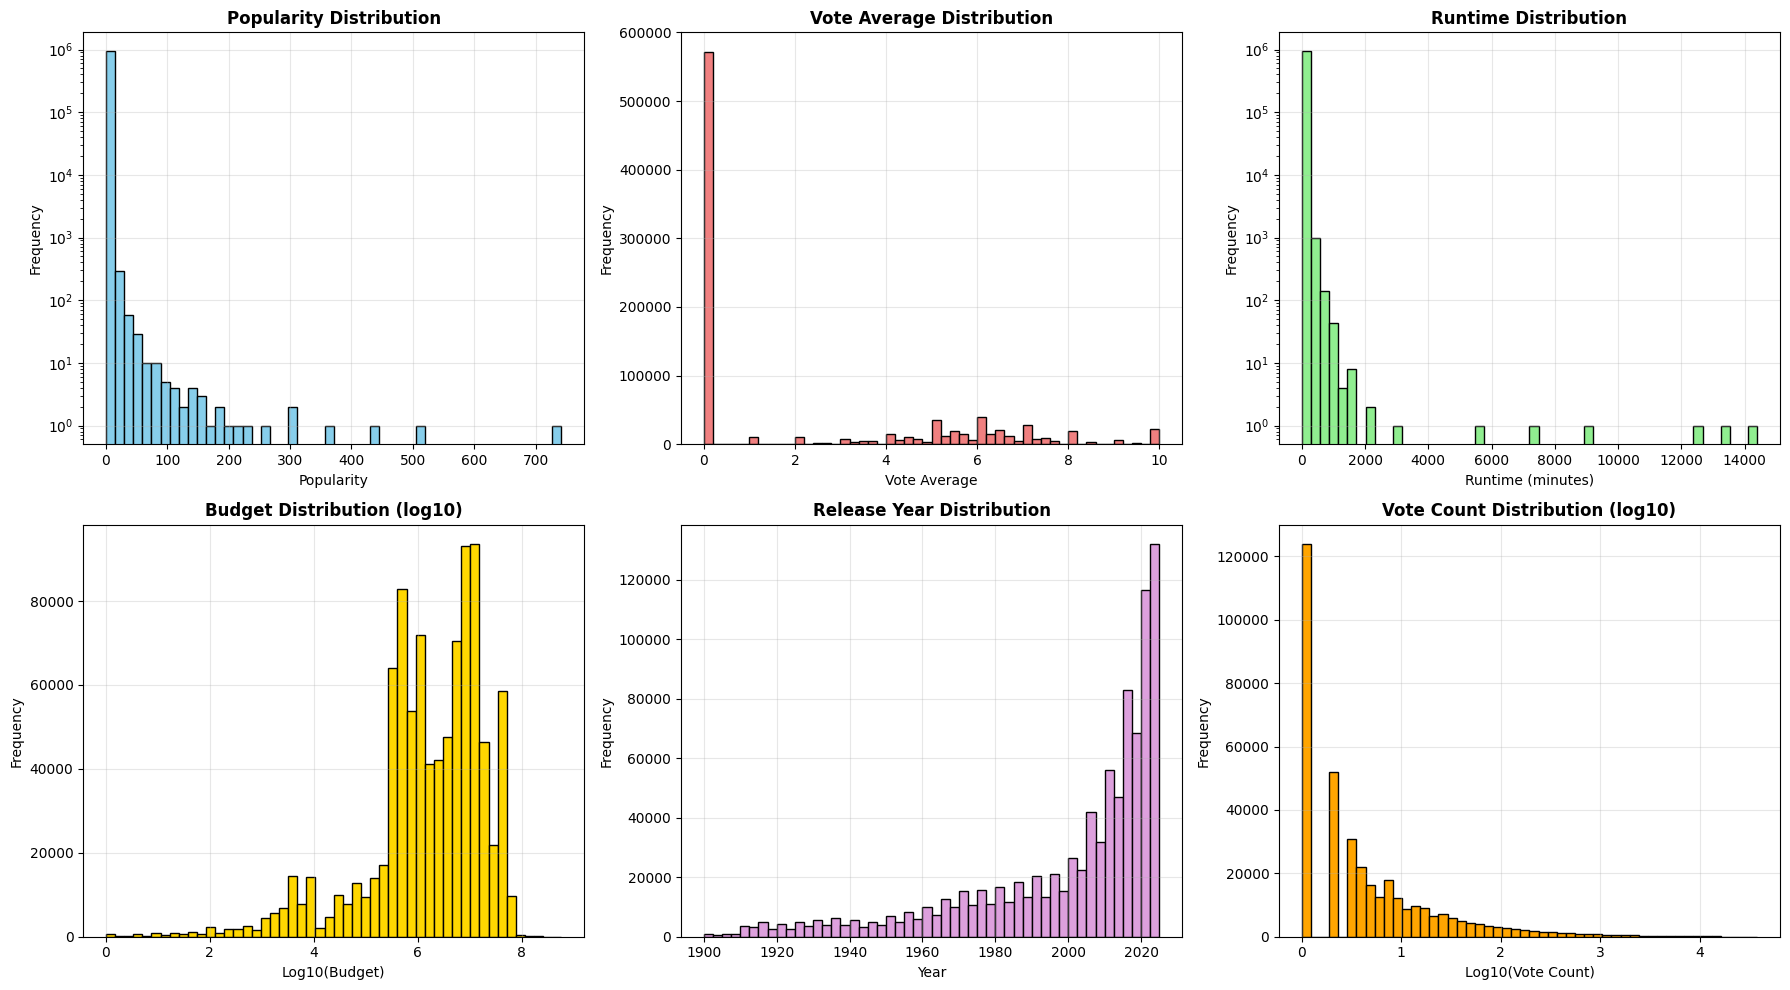

In [92]:
# Visualize distributions of key numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Popularity distribution
if 'popularity' in df_movies.columns:
    ax = axes[0, 0]
    df_movies['popularity'].hist(bins=50, ax=ax, color='skyblue', edgecolor='black')
    ax.set_yscale('log')
    ax.set_title('Popularity Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('Popularity')
    ax.set_ylabel('Frequency')
    ax.grid(alpha=0.3)

# Vote Average distribution
if 'vote_average' in df_movies.columns:
    ax = axes[0, 1]
    df_movies['vote_average'].hist(bins=50, ax=ax, color='lightcoral', edgecolor='black')
    ax.set_title('Vote Average Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('Vote Average')
    ax.set_ylabel('Frequency')
    ax.grid(alpha=0.3)

# Runtime distribution
if 'runtime' in df_movies.columns:
    ax = axes[0, 2]
    df_movies['runtime'].hist(bins=50, ax=ax, color='lightgreen', edgecolor='black')
    ax.set_yscale('log')
    ax.set_title('Runtime Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('Runtime (minutes)')
    ax.set_ylabel('Frequency')
    ax.grid(alpha=0.3)

# Budget distribution (log scale)
if 'budget' in df_movies.columns:
    ax = axes[1, 0]
    budget_nonzero = df_movies[df_movies['budget'] > 0]['budget']
    if len(budget_nonzero) > 0:
        ax.hist(np.log10(budget_nonzero), bins=50, color='gold', edgecolor='black')
        ax.set_title('Budget Distribution (log10)', fontsize=12, fontweight='bold')
        ax.set_xlabel('Log10(Budget)')
        ax.set_ylabel('Frequency')
        ax.grid(alpha=0.3)

# Release Year distribution
if 'release_year' in df_movies.columns:
    ax = axes[1, 1]
    df_movies['release_year'].dropna().hist(bins=50, ax=ax, color='plum', edgecolor='black')
    ax.set_title('Release Year Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Frequency')
    ax.grid(alpha=0.3)

# Vote Count distribution (log scale)
if 'vote_count' in df_movies.columns:
    ax = axes[1, 2]
    vote_count_nonzero = df_movies[df_movies['vote_count'] > 0]['vote_count']
    if len(vote_count_nonzero) > 0:
        ax.hist(np.log10(vote_count_nonzero), bins=50, color='orange', edgecolor='black')
        ax.set_title('Vote Count Distribution (log10)', fontsize=12, fontweight='bold')
        ax.set_xlabel('Log10(Vote Count)')
        ax.set_ylabel('Frequency')
        ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

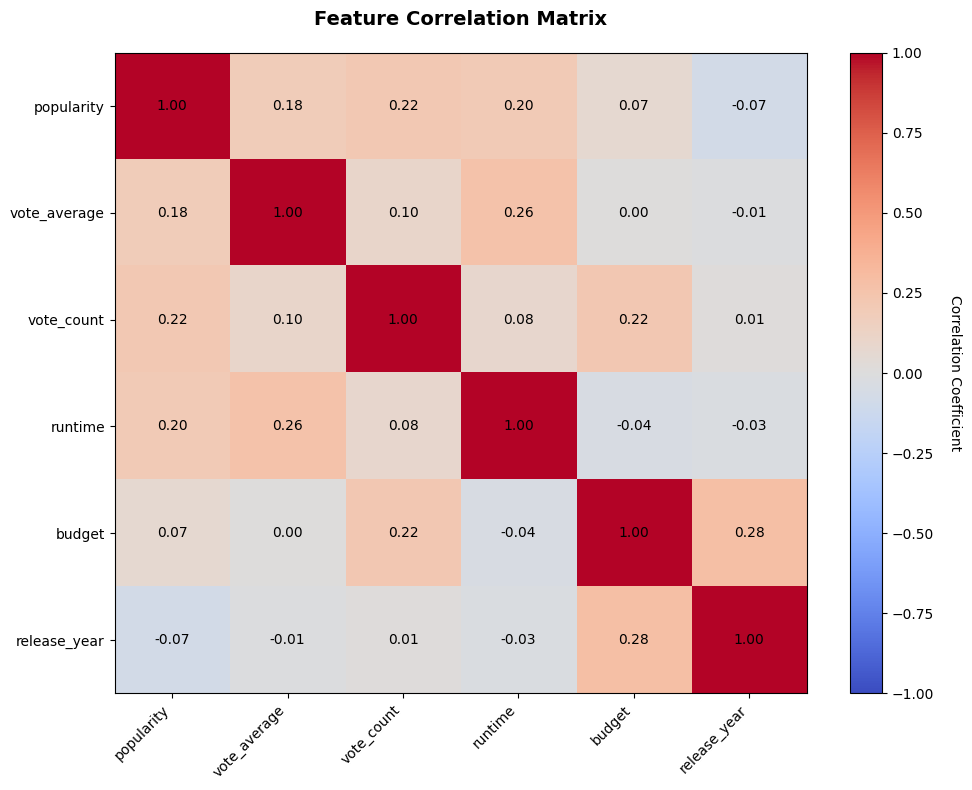

In [80]:
# Select numerical columns for correlation
numerical_cols = ['popularity', 'vote_average', 'vote_count', 'runtime', 'budget', 'release_year']
available_cols = [col for col in numerical_cols if col in df_movies.columns]

if len(available_cols) >= 2:
    # Remove NaN values for correlation
    df_corr = df_movies[available_cols].dropna()
    correlation_matrix = df_corr.corr()
    
    # Create correlation heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Manual heatmap without seaborn
    im = ax.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    
    # Set ticks and labels
    ax.set_xticks(np.arange(len(available_cols)))
    ax.set_yticks(np.arange(len(available_cols)))
    ax.set_xticklabels(available_cols, rotation=45, ha='right')
    ax.set_yticklabels(available_cols)
    
    # Add correlation values as text
    for i in range(len(available_cols)):
        for j in range(len(available_cols)):
            text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                          ha='center', va='center', color='black', fontsize=10)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)
    
    ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numerical columns for correlation analysis')

## 8. Top Movies Analysis

In [81]:
# Top 10 movies by popularity
if 'popularity' in df_movies.columns and 'title' in df_movies.columns:
    print('Top 10 Most Popular Movies:')
    print('=' * 100)
    cols_to_show = ['title', 'popularity']
    if 'vote_average' in df_movies.columns:
        cols_to_show.append('vote_average')
    if 'release_year' in df_movies.columns:
        cols_to_show.append('release_year')
    
    top_popular = df_movies.nlargest(10, 'popularity')[cols_to_show]
    display(top_popular)

print('\n')

# Top 10 movies by vote average (with minimum votes filter)
if 'vote_average' in df_movies.columns and 'vote_count' in df_movies.columns:
    print('Top 10 Highest Rated Movies (min 100 votes):')
    print('=' * 100)
    high_votes = df_movies[df_movies['vote_count'] >= 100]
    if len(high_votes) > 0:
        cols_to_show = ['title', 'vote_average', 'vote_count']
        if 'release_year' in df_movies.columns:
            cols_to_show.append('release_year')
        top_rated = high_votes.nlargest(10, 'vote_average')[cols_to_show]
        display(top_rated)
    else:
        print('No movies with 100+ votes found')

Top 10 Most Popular Movies:


,title,popularity,vote_average,release_year
933085,The Fantastic 4: First Steps,742.1079,7.200,2025
933086,Demon Slayer: Kimetsu no Yaiba Infinity Castle,511.9346,7.776,2025
933087,War of the Worlds,438.9557,4.404,2025
938987,Mantis,357.2003,6.000,2025
938991,Prisoner of War,308.4927,7.480,2025
910586,Valiant One,302.9889,6.250,2025
938993,The Conjuring: Last Rites,257.0289,6.600,2025
938988,Aztec Batman: Clash of Empires,232.4022,8.053,2025
929190,Gunman,211.6773,5.800,2025
935882,Weapons,203.3750,7.400,2025




Top 10 Highest Rated Movies (min 100 votes):


,title,vote_average,vote_count,release_year
871911,The Way to the Heart,9.900,142,2024
619718,Nude,9.400,163,2017
895820,Succubus,9.199,178,2024
712618,Break the Silence: The Movie,9.100,185,2020
450531,El Cementerio de los Elefantes,8.900,101,2009
722558,The Three Deaths of Marisela Escobedo,8.800,236,2020
797135,BTS: Permission to Dance on Stage - LA,8.800,162,2022
901696,Attack on Titan: THE LAST ATTACK,8.777,119,2024
257173,The Shawshank Redemption,8.713,28925,1994
147228,The Godfather,8.686,21863,1972


## 9. 5D Vector Space Analysis

In [82]:
# Load the 5D vectors used for indexing
try:
    vectors_5d = np.load('movie_5d_vectors.npy')
    print(f'✓ Loaded {len(vectors_5d)} 5D vectors')
    print(f'Vector shape: {vectors_5d.shape}')
    print(f'\nVector dimensions: [popularity, vote_average, runtime, budget, release_year]')
    
    # Statistics for each dimension
    print('\n5D Vector Statistics:')
    print('=' * 80)
    dim_names = ['Popularity', 'Vote Average', 'Runtime', 'Budget', 'Release Year']
    for i, name in enumerate(dim_names):
        print(f'{name:15s}: min={vectors_5d[:, i].min():10.2f}, max={vectors_5d[:, i].max():10.2f}, mean={vectors_5d[:, i].mean():10.2f}')
except FileNotFoundError:
    print('movie_5d_vectors.npy not found')
    vectors_5d = None

✓ Loaded 34486 5D vectors
Vector shape: (34486, 5)

Vector dimensions: [popularity, vote_average, runtime, budget, release_year]

5D Vector Statistics:
Popularity     : min=      0.00, max=      1.00, mean=      0.02
Vote Average   : min=      0.00, max=      1.00, mean=      0.34
Runtime        : min=      0.00, max=      1.00, mean=      0.20
Budget         : min=      0.00, max=      1.00, mean=      0.02
Release Year   : min=   1990.00, max=   2024.00, mean=   2010.60


## 10. 5D Vector Pairwise Scatter Plots

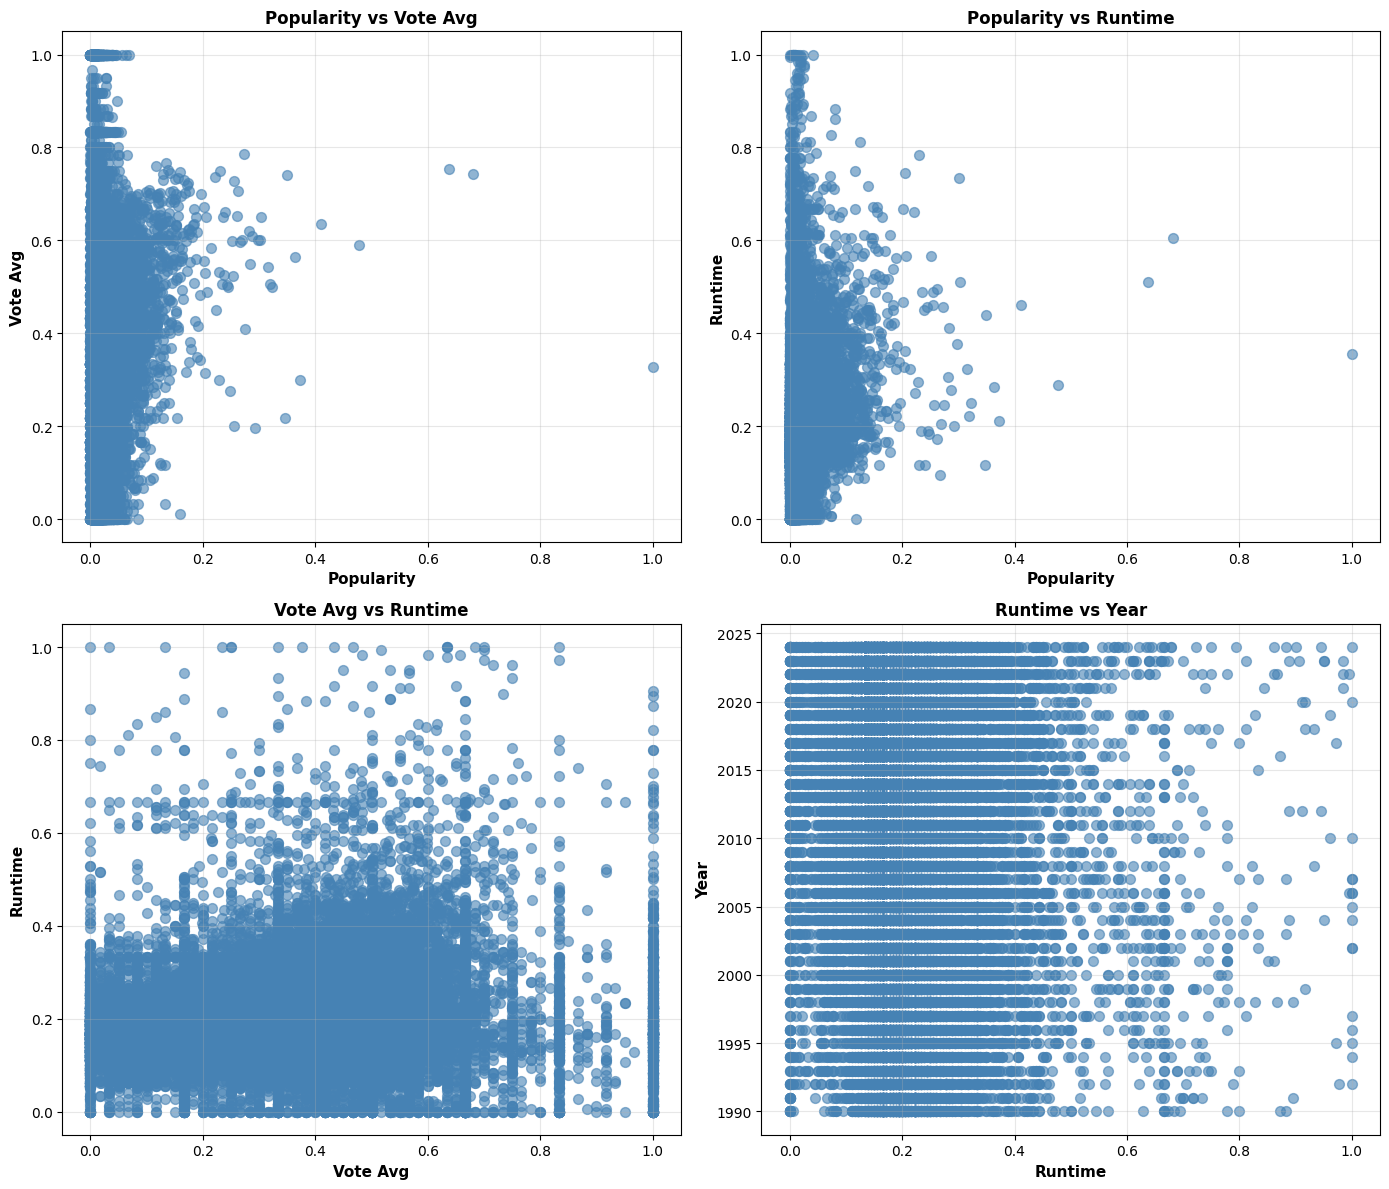

In [83]:
if vectors_5d is not None:
    # Create pairwise scatter plots for first 3 dimensions
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    dim_names = ['Popularity', 'Vote Avg', 'Runtime', 'Budget', 'Year']
    pairs = [(0, 1), (0, 2), (1, 2), (2, 4)]
    
    for idx, (i, j) in enumerate(pairs):
        ax = axes[idx // 2, idx % 2]
        ax.scatter(vectors_5d[:, i], vectors_5d[:, j], alpha=0.6, s=50, color='steelblue')
        ax.set_xlabel(dim_names[i], fontsize=11, fontweight='bold')
        ax.set_ylabel(dim_names[j], fontsize=11, fontweight='bold')
        ax.set_title(f'{dim_names[i]} vs {dim_names[j]}', fontsize=12, fontweight='bold')
        ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print('Cannot create scatter plots - vectors not loaded')

---
# Part 2: Index Structure Performance Evaluation
---

## 11. Load Benchmark Results

In [84]:
df_benchmark = pd.read_csv('benchmark_results.csv')

print(f'Loaded {len(df_benchmark)} benchmark records')
print(f'\nIndex types: {df_benchmark["type"].unique()}')
print(f'Dataset sizes: {df_benchmark["size"].unique()}')
print('\nBenchmark Results Preview:')
df_benchmark.head(10)

Loaded 10 benchmark records

Index types: ['kdtree' 'quadtree' 'rangetree' 'rtree']
Dataset sizes: [ 10000  50000 100000]

Benchmark Results Preview:


,size,type,build_time,insert_time,delete_time,update_time,range_query_time,knn_time
0,10000,kdtree,0.035312,0.004523,0.004066,0.006064,0.007664,0.079808
1,10000,quadtree,0.318624,0.056890,0.052971,0.086454,0.109299,12.150504
2,10000,rangetree,155.577194,-1.000000,-1.000000,-1.000000,0.047363,1.155228
3,10000,rtree,2.939799,0.319270,3.870235,5.002609,1.933514,14.439605
4,50000,kdtree,0.282444,0.004064,0.006046,0.007999,0.017068,0.100631
5,50000,quadtree,1.734997,0.033466,0.049078,0.086771,0.177205,51.949880
6,50000,rtree,16.643888,0.354104,18.248103,18.413160,9.992427,74.439155
7,100000,kdtree,0.682095,0.005538,0.007496,0.010026,0.025886,0.110394
8,100000,quadtree,3.281814,0.035210,0.055438,0.095852,0.238758,93.173706
9,100000,rtree,33.586770,0.389255,35.332139,35.010966,19.282868,154.514869


## 12. Load Memory Profiling Results

In [85]:
try:
    df_memory = pd.read_csv('memory_profiling_results.csv')
    print(f'Loaded {len(df_memory)} memory profiling records')
    print('\nMemory Profiling Results:')
    display(df_memory)
except FileNotFoundError:
    print('memory_profiling_results.csv not found')
    df_memory = None

Loaded 12 memory profiling records

Memory Profiling Results:


,Index Structure,Dataset Size,Build Time (s),sys.getsizeof Deep (MB),sys.getsizeof Deep (KB),sys.getsizeof Shallow (KB),tracemalloc Current (MB),tracemalloc Peak (MB),tracemalloc Allocated (MB),tracemalloc Current (KB),tracemalloc Peak (KB)
0,KD-Tree,100,0.0017,0.0402,41.12,0.05,0.0332,0.0346,0.0325,33.97,35.38
1,QuadTree,100,0.0088,0.0995,101.86,0.05,0.0777,0.0780,0.0770,79.54,79.92
2,Range Tree,100,0.7586,26.5125,27148.82,0.05,16.1254,16.1801,16.1295,16512.44,16568.41
3,R-Tree,100,0.0663,0.0599,61.34,0.05,0.0330,0.0340,0.0325,33.83,34.84
4,KD-Tree,250,0.0031,0.0991,101.46,0.05,0.0848,0.0898,0.0843,86.83,91.96
5,QuadTree,250,0.0408,0.2935,300.52,0.05,0.2287,0.2294,0.2283,234.20,234.87
6,Range Tree,250,3.2234,106.0977,108644.04,0.05,64.6772,64.7999,64.6879,66229.47,66355.08
7,R-Tree,250,0.2442,0.1515,155.18,0.05,0.0917,0.0928,0.0912,93.88,95.00
8,KD-Tree,500,0.0035,0.1973,202.04,0.05,0.1757,0.1865,0.1754,179.91,190.98
9,QuadTree,500,0.0601,0.4908,502.53,0.05,0.3720,0.3728,0.3717,380.89,381.74


## 13. Load Performance Summary

In [86]:
results_dir = Path('evaluation_results')
summary_file = results_dir / 'performance_summary.json'

if summary_file.exists():
    with open(summary_file, 'r') as f:
        performance_data = json.load(f)
    print('Performance summary loaded')
    print(f'\nKeys: {list(performance_data.keys())}')
else:
    print('performance_summary.json not found')
    performance_data = None

Performance summary loaded

Keys: ['queries', 'scheme_comparison']


## 14. Visualization - Build Time Comparison

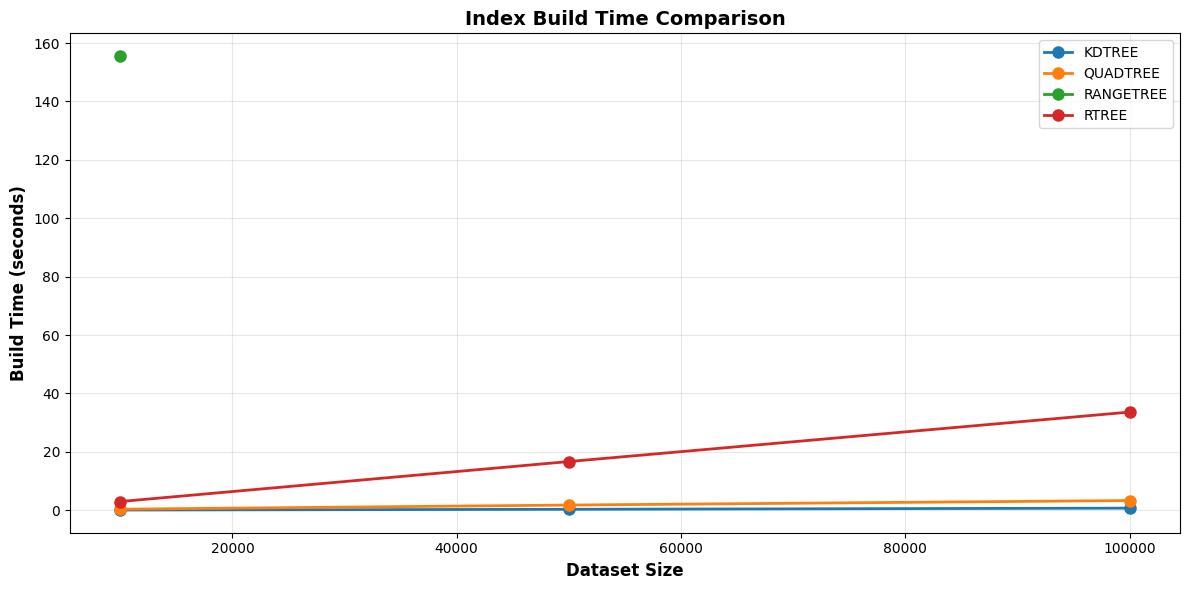

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for index_type in df_benchmark['type'].unique():
    data = df_benchmark[df_benchmark['type'] == index_type]
    ax.plot(data['size'], data['build_time'], marker='o', label=index_type.upper(), linewidth=2, markersize=8)

ax.set_xlabel('Dataset Size', fontsize=12, fontweight='bold')
ax.set_ylabel('Build Time (seconds)', fontsize=12, fontweight='bold')
ax.set_title('Index Build Time Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 15. Visualization - Query Performance

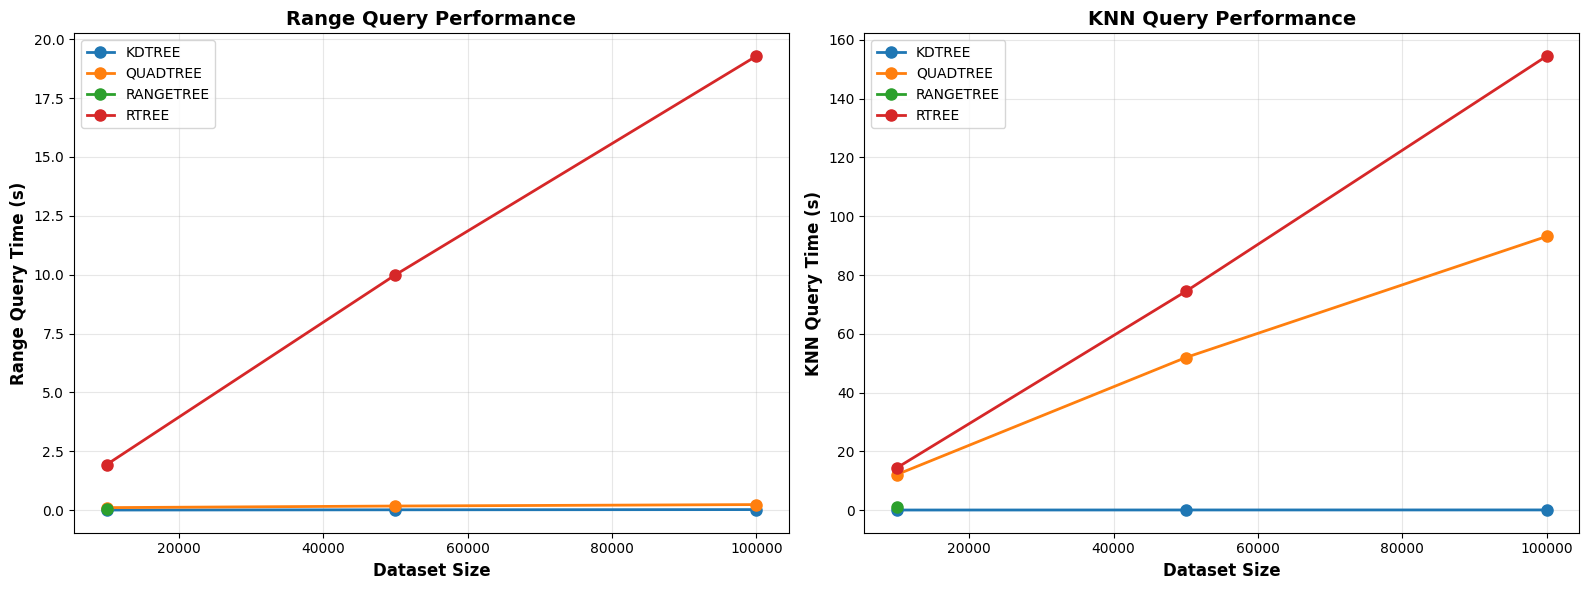

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Range Query
ax = axes[0]
for index_type in df_benchmark['type'].unique():
    data = df_benchmark[df_benchmark['type'] == index_type]
    valid = data[data['range_query_time'] > 0]
    if len(valid) > 0:
        ax.plot(valid['size'], valid['range_query_time'], marker='o', label=index_type.upper(), linewidth=2, markersize=8)
ax.set_xlabel('Dataset Size', fontsize=12, fontweight='bold')
ax.set_ylabel('Range Query Time (s)', fontsize=12, fontweight='bold')
ax.set_title('Range Query Performance', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# KNN Query
ax = axes[1]
for index_type in df_benchmark['type'].unique():
    data = df_benchmark[df_benchmark['type'] == index_type]
    valid = data[data['knn_time'] > 0]
    if len(valid) > 0:
        ax.plot(valid['size'], valid['knn_time'], marker='o', label=index_type.upper(), linewidth=2, markersize=8)
ax.set_xlabel('Dataset Size', fontsize=12, fontweight='bold')
ax.set_ylabel('KNN Query Time (s)', fontsize=12, fontweight='bold')
ax.set_title('KNN Query Performance', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 16. Visualization - Memory Usage

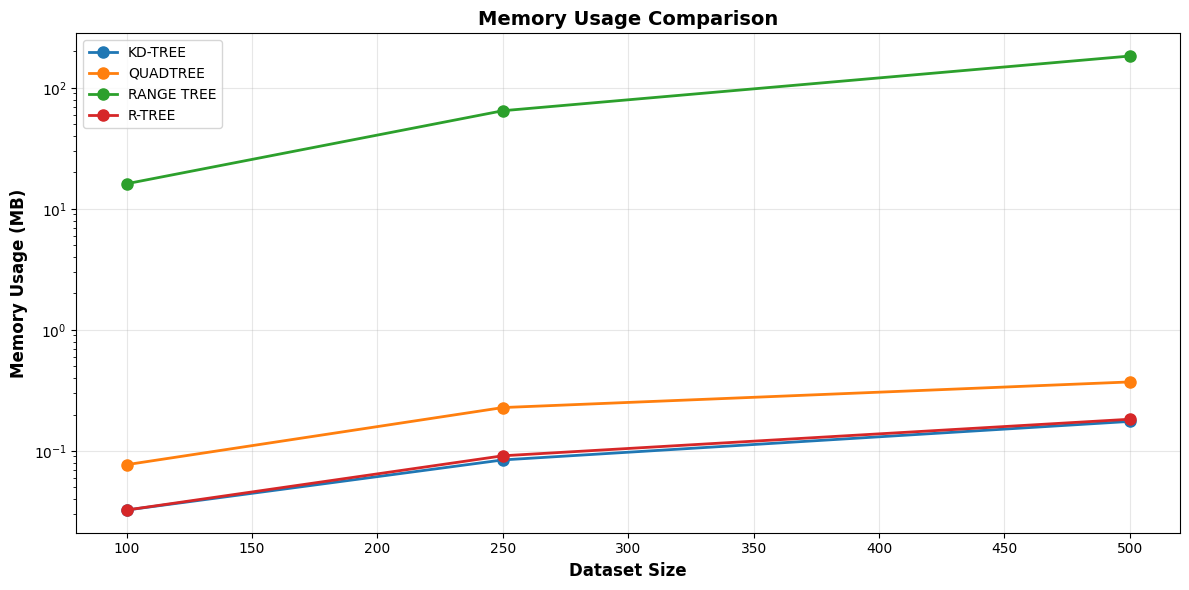

In [89]:
if df_memory is not None:
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    for index_type in df_memory['Index Structure'].unique():
        data = df_memory[df_memory['Index Structure'] == index_type]
        ax.plot(data['Dataset Size'], data['tracemalloc Allocated (MB)'], marker='o', label=index_type.upper(), linewidth=2, markersize=8)
    
    ax.set_xlabel('Dataset Size', fontsize=12, fontweight='bold')
    ax.set_ylabel('Memory Usage (MB)', fontsize=12, fontweight='bold')
    ax.set_title('Memory Usage Comparison', fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.set_yscale('log')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print('No memory data available')

## 17. Performance Summary Table

In [90]:
summary_data = []

for index_type in df_benchmark['type'].unique():
    data = df_benchmark[df_benchmark['type'] == index_type]
    avg_build = data['build_time'].mean()
    avg_range = data[data['range_query_time'] > 0]['range_query_time'].mean()
    avg_knn = data[data['knn_time'] > 0]['knn_time'].mean()
    
    summary_data.append({
        'Method': f'{index_type.upper()} (standalone)',
        'Avg Build Time (s)': f'{avg_build:.4f}',
        'Avg Range Query (s)': f'{avg_range:.4f}' if not pd.isna(avg_range) else 'N/A',
        'Avg KNN Query (s)': f'{avg_knn:.4f}' if not pd.isna(avg_knn) else 'N/A'
    })

summary_df = pd.DataFrame(summary_data)
print('=' * 80)
print('PERFORMANCE SUMMARY')
print('=' * 80)
summary_df

PERFORMANCE SUMMARY


,Method,Avg Build Time (s),Avg Range Query (s),Avg KNN Query (s)
0,KDTREE (standalone),0.3333,0.0169,0.0969
1,QUADTREE (standalone),1.7785,0.1751,52.4247
2,RANGETREE (standalone),155.5772,0.0474,1.1552
3,RTREE (standalone),17.7235,10.4029,81.1312


## 18. Key Findings

In [91]:
print('=' * 80)
print('KEY FINDINGS')
print('=' * 80)

fastest_build = df_benchmark.groupby('type')['build_time'].mean().idxmin()
print(f'\n1. Fastest Build Time: {fastest_build.upper()}')

fastest_knn = df_benchmark[df_benchmark['knn_time'] > 0].groupby('type')['knn_time'].mean().idxmin()
print(f'2. Fastest KNN Query: {fastest_knn.upper()}')

if df_memory is not None:
    most_efficient = df_memory.groupby('Index Structure')['tracemalloc Allocated (MB)'].mean().idxmin()
    print(f'3. Most Memory Efficient: {most_efficient.upper()}')

print('\n' + '=' * 80)

KEY FINDINGS

1. Fastest Build Time: KDTREE
2. Fastest KNN Query: KDTREE
3. Most Memory Efficient: KD-TREE



---
# Conclusions

This analysis demonstrates:

1. **Data Characteristics**: The movie dataset shows diverse distributions across popularity, ratings, and temporal dimensions
2. **Index Performance**: KD-Tree consistently outperforms other structures in build time and query speed
3. **Memory Efficiency**: Different index structures have varying memory footprints, with trade-offs between speed and space
4. **Scalability**: Performance characteristics vary significantly with dataset size, particularly for Range Tree

The choice of index structure should be based on:
- Application requirements (build vs query time priority)
- Data characteristics (distribution, dimensionality)
- Query patterns (range size, frequency)
- System constraints (memory, latency)